<a href="https://colab.research.google.com/github/Meghana47-Analyst/Costofliving/blob/main/cost_of_living.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd



In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from google.colab import files


uploaded = files.upload()



Saving Cost_of_Living_Index_2022.csv to Cost_of_Living_Index_2022 (1).csv


In [19]:

import io

df = pd.read_csv(io.BytesIO(uploaded['Cost_of_Living_Index_2022.csv']))
print(df)



     Rank      Country  Cost of Living Index  Rent Index  \
0       1  Afghanistan                 20.37        2.72   
1       2      Albania                 35.50        8.47   
2       3      Algeria                 26.87        4.59   
3       4    Argentina                 34.69        7.71   
4       5      Armenia                 33.89       11.61   
..    ...          ...                   ...         ...   
134   135    Venezuela                 43.20        9.99   
135   136      Vietnam                 37.48       13.22   
136   137        Yemen                 53.14        6.71   
137   138       Zambia                 33.04        9.26   
138   139     Zimbabwe                 45.68        8.75   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                             12.09            14.92                   12.41   
1                             22.83            29.32                   25.82   
2                             16.43    

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [17]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86


In [20]:
df.tail()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33
138,139,Zimbabwe,45.68,8.75,28.37,39.88,38.13,19.07


EDA

In [30]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


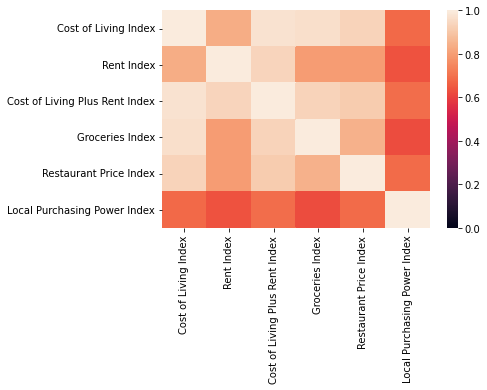

In [31]:
sns.heatmap(df.drop('Rank',axis=1).corr(),vmin=0.0)

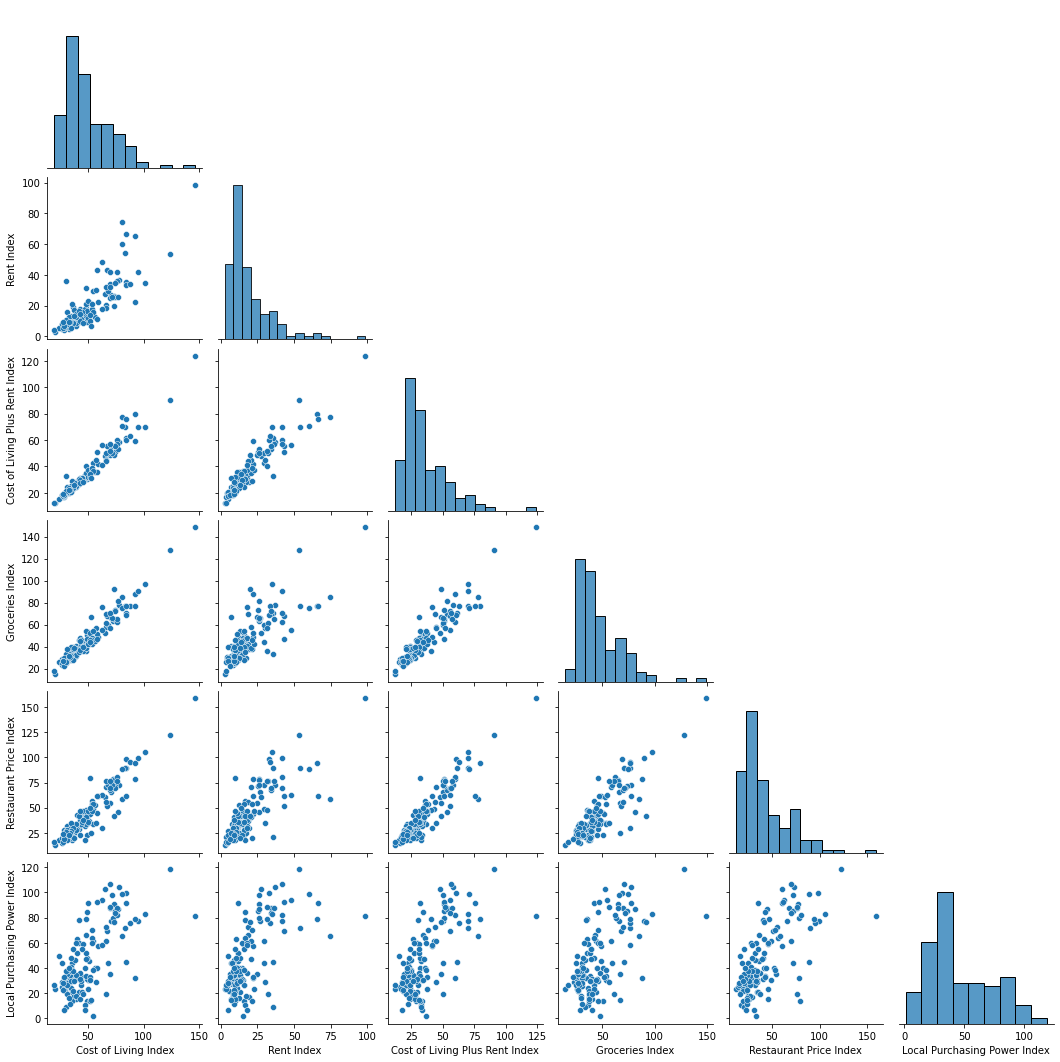

In [33]:
sns.pairplot(df.drop('Rank',axis=1),corner =True  )

The diagonal graphs show a right skewed histogram. This is basically the 
univariate analysis of the features.This tells us that the central tendencies of the cost of living is towards the lower side.
We see a strong correlation between the cost of living,rent and cost of living plus rent index. So we can drop two of them.
Overall , all of the features have a positive correlation with each other, and that is to be expected. As all of them give in a way how pricey it is to live in the country.(except of course the Local Purchase Index)
The local purchase index shows an irregularity.It has an positive correlation, even though the local purchasing power of a country is proportional to the amount of goods you can buy with a typical salary.

In [35]:
data = df.drop(labels=['Cost of Living Index','Rent Index'],axis=1)

Finding most expensive countries 

In [36]:
data['total_price_index'] = df[['Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index']].sum(axis=1)/3

In [37]:
expensive = data.sort_values(by='total_price_index',ascending=False).head(20)
expensive

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
15,16,Bermuda,123.80,148.66,159.17,81.07,143.876667
119,120,Switzerland,90.62,128.13,122.09,118.44,113.613333
90,91,Norway,69.86,97.31,105.49,83.11,90.886667
51,52,Iceland,70.05,90.22,99.42,77.06,86.563333
62,63,Jersey,79.51,76.88,94.65,79.14,83.680000
47,48,Guernsey,69.73,76.76,89.98,71.57,78.823333
57,58,Israel,62.69,76.72,95.31,75.58,78.240000
72,73,Luxembourg,70.93,74.75,88.79,98.84,78.156667
32,33,Denmark,60.26,68.60,98.75,99.45,75.870000
11,12,Barbados,59.38,87.81,78.18,32.08,75.123333


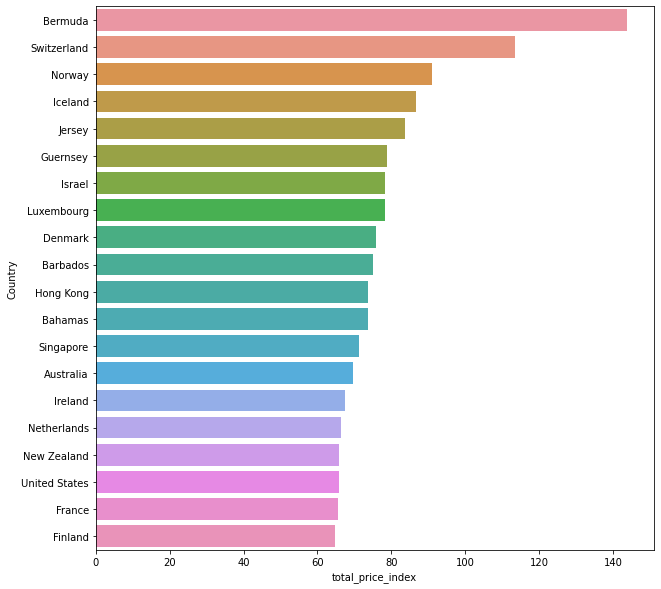

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(x=expensive['total_price_index'],y=expensive['Country'])

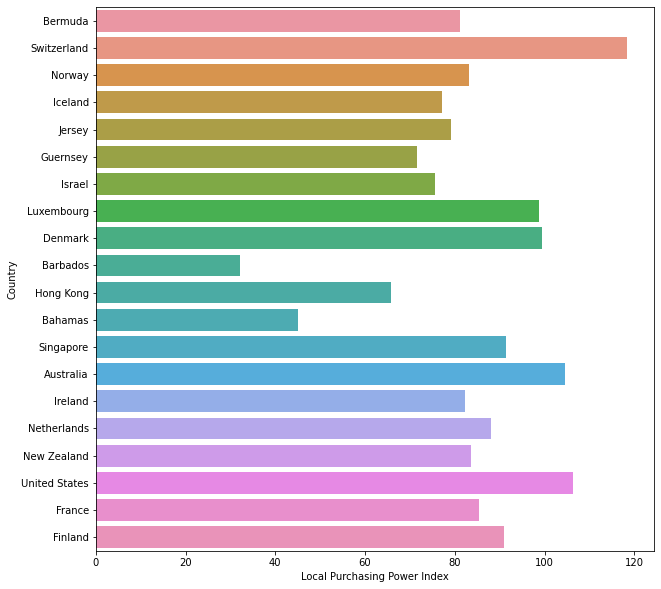

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x=expensive['Local Purchasing Power Index'],y=expensive['Country'])

Comparitively to the expensive countries Barbados and Bahamas has lower purchasing power

Finding cheapest country to live

In [40]:
cheap = data.sort_values(by='total_price_index').head(20)
cheap

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
0,1,Afghanistan,12.09,14.92,12.41,23.04,13.140000
92,93,Pakistan,12.42,17.81,15.54,26.63,15.256667
126,127,Turkey,18.15,22.64,18.40,32.88,19.730000
52,53,India,15.47,26.43,17.56,49.72,19.820000
2,3,Algeria,16.43,28.82,14.48,24.63,19.910000
125,126,Tunisia,17.30,27.36,15.96,27.83,20.206667
26,27,Colombia,18.03,23.47,19.44,28.85,20.313333
66,67,Kosovo (Disputed Territory),18.14,24.84,19.53,43.86,20.836667
84,85,Nepal,16.89,26.45,20.41,22.96,21.250000
89,90,North Macedonia,19.51,26.95,21.02,35.44,22.493333


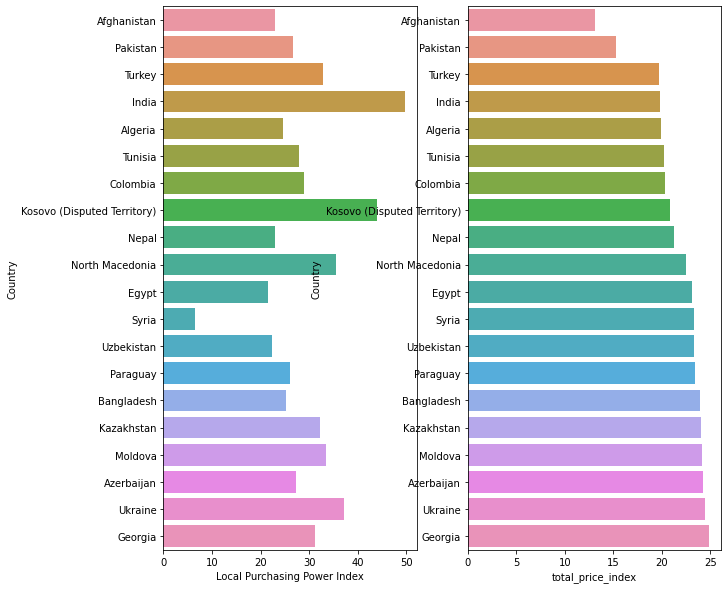

In [41]:
fig,axes = plt.subplots(1,2,figsize=(10,10))
sns.barplot(x=cheap['Local Purchasing Power Index'],y=cheap['Country'],ax=axes[0])
sns.barplot(x=cheap['total_price_index'],y=cheap['Country'],ax=axes[1])

Comparing cheap countries, India has highest LPP index to live. Therefore for the minimum wage people earn, Indians get 50% less goods compared to new york which is also better than other countries listed.

FINDING HIGHEST PURCHASING POWER

In [42]:
purchase = data.sort_values(by='Local Purchasing Power Index',ascending =False).head(20)
purchase

,Rank,Country,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,total_price_index
119,120,Switzerland,90.62,128.13,122.09,118.44,113.613333
131,132,United States,56.98,70.37,70.07,106.34,65.806667
5,6,Australia,58.57,77.44,72.95,104.63,69.653333
43,44,Germany,47.78,52.31,60.91,103.08,53.666667
32,33,Denmark,60.26,68.60,98.75,99.45,75.870000
72,73,Luxembourg,70.93,74.75,88.79,98.84,78.156667
118,119,Sweden,50.23,65.78,72.61,98.14,62.873333
101,102,Qatar,55.96,54.97,63.01,93.67,57.980000
129,130,United Arab Emirates,51.28,46.67,61.53,92.17,53.160000
105,106,Saudi Arabia,32.25,42.57,35.50,91.85,36.773333


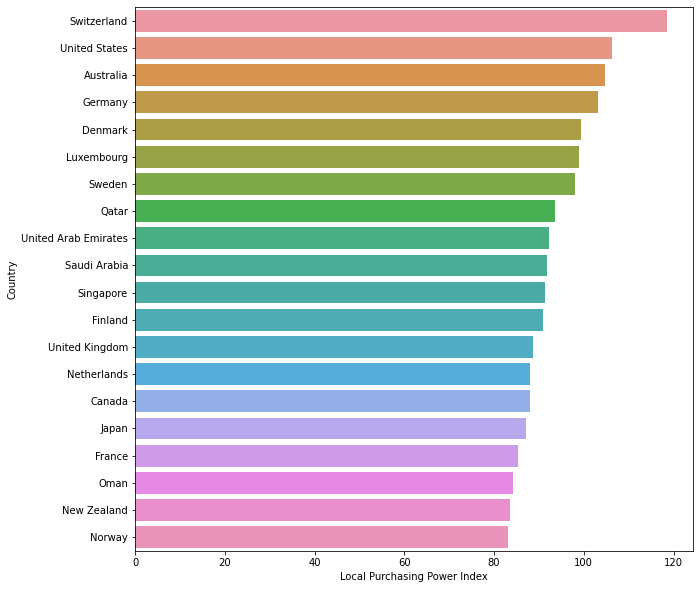

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(x=purchase['Local Purchasing Power Index'],y=purchase['Country'])

From the graph, swizerland and USA has highest purchasing power